# Explore here

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')
data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [30]:
data.shape

(366, 2)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [32]:
data['date'] = pd.to_datetime(data['date'])  # Convertimos la columna "date" al formato datetime

data['date'] = data['date'].dt.date   # Eliminamos las horas de la columna "date" y dejamos solo el día, el año y el mes

# .dt: accesorio especial para las columnas de tipo fecha y hora en pandas que permite acceder a métodos específicos de fecha y hora.
# .date: Este método se aplica al accesorio .dt y se utiliza para extraer solo la fecha (sin la hora) de cada valor de fecha y hora en la columna 'date'.
#Convierte los valores de fecha y hora en objetos de fecha (datetime.date), que representan solo la parte de fecha sin la parte de hora.

data.head()

,date,sales
0,2022-09-03,55.292157
1,2022-09-04,53.803211
2,2022-09-05,58.141693
3,2022-09-06,64.530899
4,2022-09-07,66.013633


In [33]:
print(data['date'].min(),data['date'].max())

2022-09-03 2023-09-03


In [34]:
data = data.set_index("date")  # establece la columna "date" como el índice del DataFrame
ts = data["sales"]

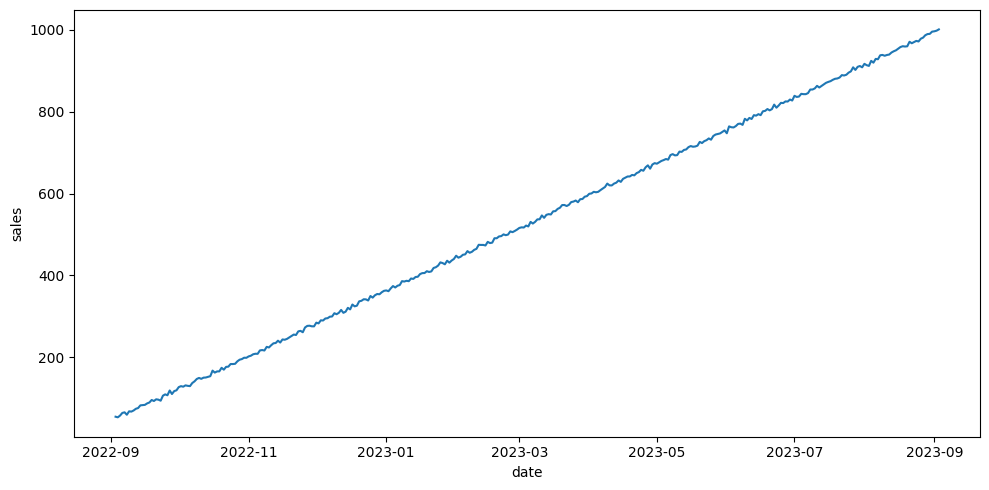

In [35]:
# Visualizamos la serie temporal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

 - Tendencia: La tendencia es claramente ascendente, lo que indica un crecimiento constante en las ventas a lo largo del tiempo. Esto podría deberse a un aumento en la demanda de los productos o servicios ofrecidos.

 - Estacionalidad: Dado que no se observa una variación cíclica o estacional clara en los datos, es posible que no haya patrones estacionales significativos en las ventas. Sin embargo, para confirmar esto, sería necesario realizar un análisis más detallado, como descomponer la serie temporal en componentes de tendencia, estacionalidad y residuos.

 - Variabilidad: La variabilidad en la serie parece ser relativamente baja, ya que la línea es casi recta. Esto sugiere una consistencia en las ventas a lo largo del tiempo, con poca fluctuación.

 - Puntos atípicos: No parece haber puntos atípicos o valores extremadamente altos o bajos que se aparten significativamente de la tendencia general de crecimiento. Sin embargo, para confirmar la presencia de puntos atípicos, sería necesario realizar un análisis estadístico más exhaustivo, como identificar valores atípicos basados en criterios específicos.

 - Puntos de inflexión: Dado que la serie muestra una tendencia claramente ascendente sin cambios bruscos en la dirección, es poco probable que haya puntos de inflexión evidentes en los datos. Los puntos de inflexión representan cambios en la dirección de la tendencia, y su ausencia sugiere una evolución gradual y constante en las ventas.

Descomposición de la serie

In [36]:
decomposition = seasonal_decompose(ts, period = 12)
decomposition

# función 'seasonal_decompose' a la serie temporal 'ts' con un período de estacionalidad especificado como '12'.
# La estacionalidad se refiere a patrones que se repiten a lo largo de un período fijo, como los ciclos estacionales mensuales en datos de ventas.
# El parámetro period especifica la longitud del período estacional. En este caso, se asume que hay una estacionalidad de 12 meses (un año).

<statsmodels.tsa.seasonal.DecomposeResult at 0x7f7947b08dc0> es la representación del objeto devuelto por la función seasonal_decompose de statsmodels. Este objeto contiene los resultados de la descomposición estacional, que incluyen la tendencia, la estacionalidad y el residuo. Puedes acceder a estos componentes a través de los atributos del objeto DecomposeResult.